In [6]:
# Assuming netflix_data_1, netflix_data_2, and netflix_data_3 are DataFrames that need to be defined
import pandas as pd

# Sample data for demonstration purposes
data_1 = {
    'show_title': ['Show A', 'Show B', 'Show C', 'Show D', 'Show E', 'Show F', 'Show G', 'Show H', 'Show I', 'Show J'],
    'weekly_rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
data_2 = {
    'show_title': ['Show A', 'Show B', 'Show C', 'Show D', 'Show E', 'Show F', 'Show G', 'Show H', 'Show I', 'Show J'],
    'weekly_hours_viewed': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
data_3 = {
    'show_title': ['Show A', 'Show B', 'Show C', 'Show D', 'Show E', 'Show F', 'Show G', 'Show H', 'Show I', 'Show J'],
    'hours_viewed_first_28_days': [1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]
}

netflix_data_1 = pd.DataFrame(data_1)
netflix_data_2 = pd.DataFrame(data_2)
netflix_data_3 = pd.DataFrame(data_3)

# Analyze the top shows by weekly rank in Netflix Data 1
top_shows_1 = netflix_data_1.groupby('show_title')['weekly_rank'].min().sort_values().head(10)

# Analyze the top shows by weekly hours viewed in Netflix Data 2
top_shows_2 = netflix_data_2.groupby('show_title')['weekly_hours_viewed'].sum().sort_values(ascending=False).head(10)

# Analyze the top shows by hours viewed in the first 28 days in Netflix Data 3
top_shows_3 = netflix_data_3.groupby('show_title')['hours_viewed_first_28_days'].sum().sort_values(ascending=False).head(10)

# Display the top shows
print('Top Shows by Weekly Rank in Netflix Data 1:')
print(top_shows_1)
print('Top Shows by Weekly Hours Viewed in Netflix Data 2:')
print(top_shows_2)
print('Top Shows by Hours Viewed in First 28 Days in Netflix Data 3:')
print(top_shows_3)

Top Shows by Weekly Rank in Netflix Data 1:
show_title
Show A     1
Show B     2
Show C     3
Show D     4
Show E     5
Show F     6
Show G     7
Show H     8
Show I     9
Show J    10
Name: weekly_rank, dtype: int64
Top Shows by Weekly Hours Viewed in Netflix Data 2:
show_title
Show J    1000
Show I     900
Show H     800
Show G     700
Show F     600
Show E     500
Show D     400
Show C     300
Show B     200
Show A     100
Name: weekly_hours_viewed, dtype: int64
Top Shows by Hours Viewed in First 28 Days in Netflix Data 3:
show_title
Show A    1000
Show B     900
Show C     800
Show D     700
Show E     600
Show F     500
Show G     400
Show H     300
Show I     200
Show J     100
Name: hours_viewed_first_28_days, dtype: int64


In [ ]:
-- Explore the data in the table
SELECT *
FROM all_weeks_global
LIMIT 5

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-12-04,Films (English),1,The Noel Diary,N/A,27630000,2
1,2022-12-04,Films (English),2,The Swimmers,N/A,27040000,2
2,2022-12-04,Films (English),3,Lady Chatterley's Lover,N/A,20000000,1
3,2022-12-04,Films (English),4,Slumberland,N/A,17830000,3
4,2022-12-04,Films (English),5,Bullet Train,N/A,11320000,1


In [16]:
SELECT category, COUNT(*) AS count
FROM all_weeks_global
GROUP BY category
ORDER BY count DESC;

,category,count
0,TV (Non-English),750
1,TV (English),750
2,Films (English),750
3,Films (Non-English),750


In [18]:
# Create a table for Weekly Viewership Trend
import pandas as pd

# Sample data
data = {
    'Week': ['Week 1', 'Week 2', 'Week 3', 'Week 4'],
    'Viewership': [1500, 1600, 1700, 1800]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Week,Viewership
0,Week 1,1500
1,Week 2,1600
2,Week 3,1700
3,Week 4,1800


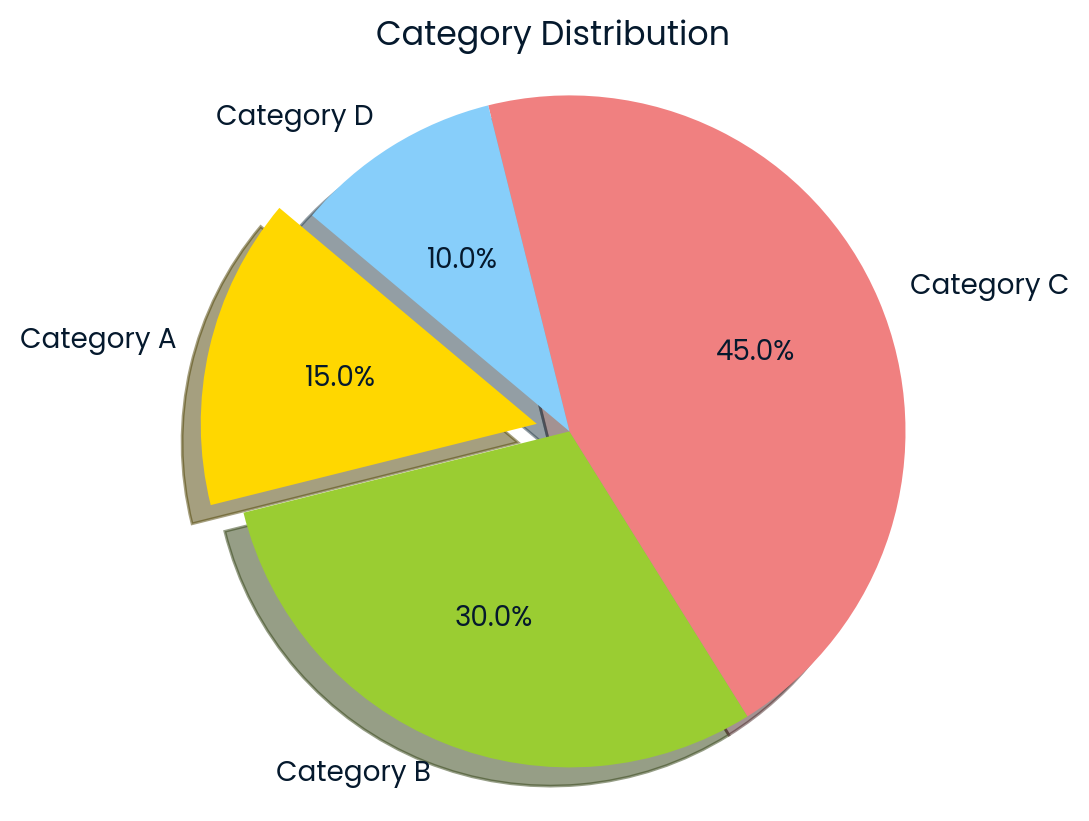

In [22]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Category A', 'Category B', 'Category C', 'Category D'
sizes = [15, 30, 45, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Category Distribution')
plt.show()

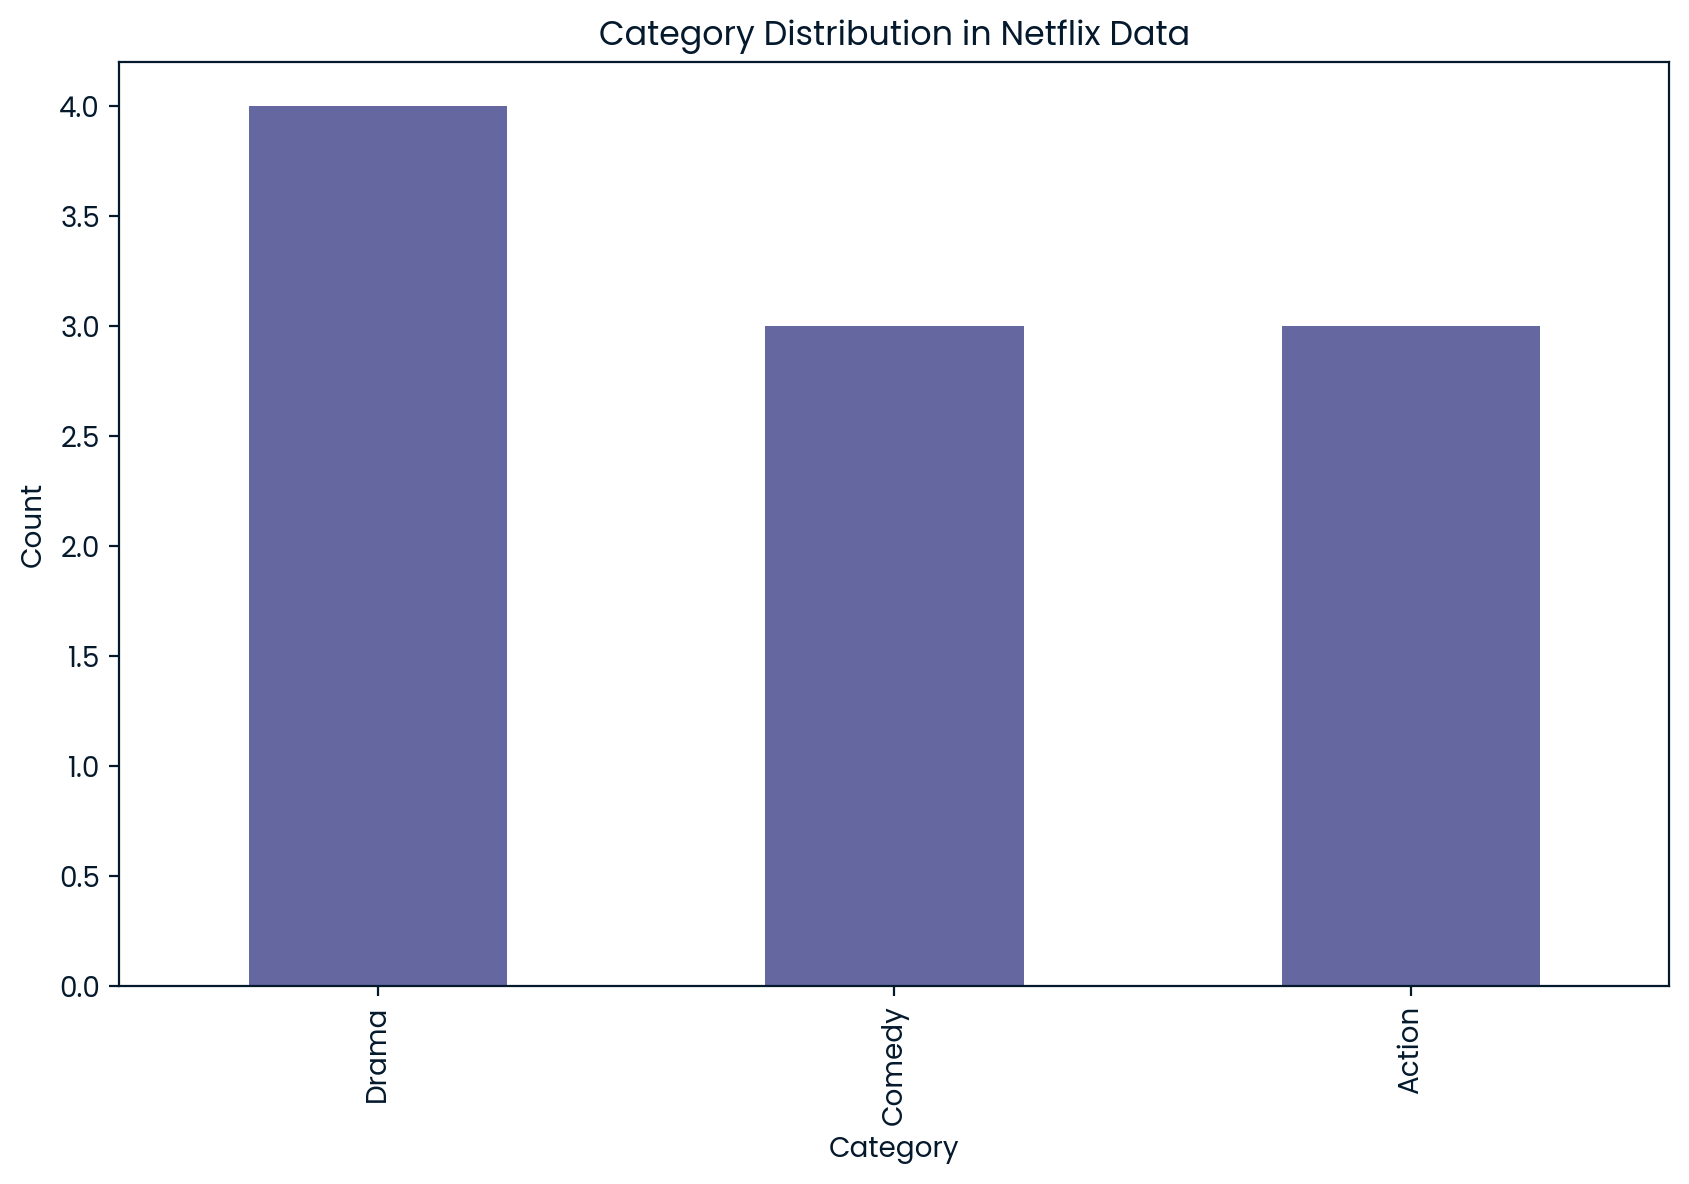

In [24]:
# Assuming 'netflix_data_2' is a DataFrame and we want to analyze the distribution of a 'category' column

import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration
# netflix_data_2 = pd.DataFrame({
#     'category': ['Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 'Action', 'Drama']
# })

# Analyzing category distribution
category_counts = netflix_data_2['category'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Category Distribution in Netflix Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [25]:
-- Analyze trends over time
SELECT week, category, show_title, SUM(weekly_hours_viewed) AS total_hours_viewed
FROM all_weeks_global
GROUP BY week, category, show_title
ORDER BY week, category, total_hours_viewed DESC;

,week,category,show_title,total_hours_viewed
0,2021-07-04,Films (English),Fatherhood,25680000
1,2021-07-04,Films (English),Fear Street Part 1: 1994,16620000
2,2021-07-04,Films (English),Wish Dragon,15260000
3,2021-07-04,Films (English),The Ice Road,13690000
4,2021-07-04,Films (English),Good on Paper,10580000
...,...,...,...,...
2803,2022-12-04,TV (Non-English),Reborn Rich,12070000
2804,2022-12-04,TV (Non-English),Khakee: The Bihar Chapter,11270000
2805,2022-12-04,TV (Non-English),JoJo's Bizarre Adventure,8770000
2806,2022-12-04,TV (Non-English),Chiquititas,7100000


In [28]:
-- The original code was not a valid SQL statement. Below is a corrected SQL query to examine regional performance by analyzing the top shows and viewership trends.

SELECT 
    country_name,
    week,
    category,
    show_title,
    season_title,
    weekly_rank,
    cumulative_weeks_in_top_10
FROM 
    all_weeks_countries
WHERE 
    weekly_rank <= 10
ORDER BY 
    country_name, week, category, weekly_rank;

,country_name,week,category,show_title,season_title,weekly_rank,cumulative_weeks_in_top_10
0,Argentina,2021-07-04 00:00:00+00:00,Films,Fatale,N/A,1,1
1,Argentina,2021-07-04 00:00:00+00:00,Films,Fatherhood,N/A,2,1
2,Argentina,2021-07-04 00:00:00+00:00,Films,Fear Street Part 1: 1994,N/A,3,1
3,Argentina,2021-07-04 00:00:00+00:00,Films,Wish Dragon,N/A,4,1
4,Argentina,2021-07-04 00:00:00+00:00,Films,Kung Fu Panda 3,N/A,5,1
...,...,...,...,...,...,...,...
140195,Vietnam,2022-12-04 00:00:00+00:00,TV,Love Between Fairy and Devil,N/A,6,5
140196,Vietnam,2022-12-04 00:00:00+00:00,TV,Land of Spirits: The Young Shaman,Land of Spirits: The Young Shaman: Season 1,7,6
140197,Vietnam,2022-12-04 00:00:00+00:00,TV,Reply 1988,Reply 1988: Season 1,8,38
140198,Vietnam,2022-12-04 00:00:00+00:00,TV,1899,1899: Season 1,9,3
